In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
import torch 
import matplotlib.pyplot as plt

In [9]:
import ipywidgets as widgets

In [10]:
def f(o): print('hi')

In [11]:
w = widgets.Button(description='click me')

In [12]:
w

Button(description='click me', style=ButtonStyle())

In [13]:
w.on_click(f)

In this case f is a callback, where we are passing a function to the on_click method, events are considered a kind of callback, a callback can be viewed as a function pointer

In [14]:
w

Button(description='click me', style=ButtonStyle())

### Creating your own callback

In [15]:
from time import sleep

In [16]:
def slow_calc(cb=None):
    res = 0
    for i in range(3):
        res += i*i
        sleep(1)
        if cb: cb(i)
    return res

In [17]:
def show_progress(e):
    print(f"epoch {e} has been completed")

In [18]:
slow_calc(show_progress)

epoch 0 has been completed
epoch 1 has been completed
epoch 2 has been completed


5

### Lambdas and partials

Notice that the arguments come before the ":"

In [19]:
slow_calc(lambda o: print(f"epoch {o} has been completed!"))

epoch 0 has been completed!
epoch 1 has been completed!
epoch 2 has been completed!


5

In [20]:
def show_progress(expression, e):
    print(f'{expression} epoch no {e} has been completed')

In [21]:
slow_calc(lambda o: show_progress('Damn!!', o))

Damn!! epoch no 0 has been completed
Damn!! epoch no 1 has been completed
Damn!! epoch no 2 has been completed


5

In [22]:
def make_show_progress(expression):
    _inner = lambda e: print(f"{expression} epoch no {e} has been completed")
    return _inner

In [23]:
slow_calc(make_show_progress('Huh!'))

Huh! epoch no 0 has been completed
Huh! epoch no 1 has been completed
Huh! epoch no 2 has been completed


5

Classes can be callbacks too!

One thing we can do is add __call__ to the class to make the instance callable , if need be with params

### Vim Notes

Jump to symbol e.g. class or function `:tag create_` + tab (loops through matching strings) + ENTER

ctrl + ] , takes user to definition of the symbol you clicked on

VIM allows for folding or outlining - may be worth looking at this

ctrl + t , takes you to the most recent tag

:Ack lambda , will provide a list of all the places where lambda has been used



### Variance

Variance is the average of how far away each data point is from the mean. How much does the data vary.

In [24]:
t = torch.tensor([1.,2.,4.,18])

In [25]:
m = t.mean();m

tensor(6.2500)

In [26]:
(t-m).mean() # doesn't work because +ve and -ve values cancel each other out

tensor(0.)

In [27]:
(t-m).pow(2).mean()

tensor(47.1875)

In [28]:
# another way is to take the abs value
(t-m).abs().mean() # mean absolute deviation

tensor(5.8750)

Looking at the values shows that we need to take the root of the value we've squared, because the scale of the difference changes to dramatically

In [29]:
(t-m).pow(2).mean().sqrt() # a.k.a. standard deviation

tensor(6.8693)

The standard deviation is more sensitive to outliers, which makes the mean absolute deviation a more preferrable indicator of variance in the data.

<strong>Note to keep in mind</strong> abs values are often better to use than squared thingies. 

Squared thingies are more popular, because the math plays nicer with the proofs.

In [30]:
(t-m).pow(2).mean(), (t*t).mean() - (m*m) # are the same , the latter is a better implementation

(tensor(47.1875), tensor(47.1875))

The implementation on the top right is better because we only need to keep track of 2 numbers

### Covariance and correlation

In [31]:
t

tensor([ 1.,  2.,  4., 18.])

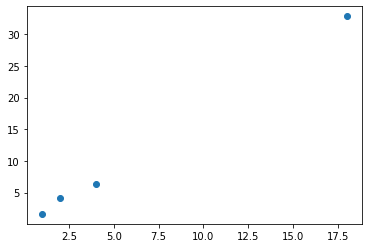

In [32]:
# u is twice t with some randomness
u = t*2
u *= torch.randn_like(t)/10+0.95 # random_normal

plt.scatter(t, u);

In [33]:
u

tensor([ 1.5541,  3.9287,  7.5093, 34.0040])

In [40]:
# now we're comparing the difference between each item of t and it's mean multiplied by each u and it's mean
prod = (t-t.mean())*(u-u.mean()); prod

tensor([ 50.4394,  29.9425,  11.0947, 253.6093])

In [41]:
prod.mean()

tensor(86.2715)

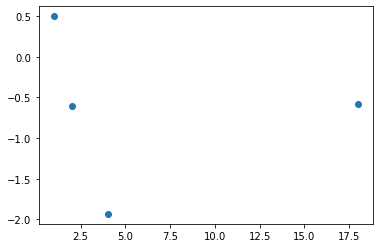

In [42]:
v = torch.randn_like(t)
plt.scatter(t,v)

In [45]:
# cov indicates how "lined-up" a set of numbers are
((t-t.mean())*(v-v.mean())).mean()

tensor(-0.6108)

If the numbers are similar, we should end up with a larger number, because we are multiplying e.g. non-contrasting numbers with oneanother. Looking at the example of the covariance between a random set of numbers and the tensor t above (showing a negative value) indicates that the numbers are not very aligned.

E[X] - E thingy with brackets indicates the mean of X in this example

In [48]:
# another way to write it is
cov = (t*v).mean() - t.mean()*v.mean(); cov

tensor(-0.6108)

Correlation is simply the covariance divided by the product of the respective standard deviations

In [55]:
cov / (t.std() * v.std()) # Pearson correlation co-efficient - which essentially just a scaled version of the same thing (cov)

tensor(-0.0773)

The downside of these metrics is that they only provide information on the linear variation of the values, for non-linear relationships we have neural-networks

Softmax likes to select one thing and make it big, because of the exponential in the function. Softmax is mainly helpful when you have data inside the target distribution. When using out-of-distribution data it tends to provide non-sensical results.

When working with data that the softmax function might have trouble with , a binomial function could be more helpful. Which is the same as softmax, when working with boolean data.

In [60]:
import math

In [63]:
math.exp(0.02) / (1 + math.exp(0.02)) # binomial for 0.02

0.5049998333399998

In [64]:
math.exp(-1.42) / (1 + math.exp(-1.42))# binomial for -1.42

0.19466158359157792

The binomial distribution tends to provide better results, however historically the reason softmax has been predominantly used in neural-net powered computer vision is because of ImageNet, where the dataset has been curated to only have a single occurence of the target class in the images.

Creating a missing class doesn't work because, the activations in the pen-ultimate layer need to respond to something, they are looking for matching features i.e. something to fire on. 

So creating a binomial for each class is the way to go i.e. has fish, don't has fish, has cat and don't has cat.

In [65]:
!ls

00_fai_2_l8.ipynb           05_anneal.ipynb
01_matmul.ipynb             05a_foundations.ipynb
02_fully_connected.ipynb    data
02a_why_sqrt5.ipynb         exp
02b_good_init.ipynb         notebook2script.py
03_minibatch_training.ipynb run_notebook.py
04_callbacks.ipynb
